In [2]:
import pdftotext
import nltk
from nltk.corpus import stopwords
import pandas as pd
from pathlib import Path

In [12]:
# text tokenization
nltk.download('punkt')

# stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/ryanrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## load pdf

In [3]:
path = "test_pdf/dummy_test.pdf"
with open(path, "rb") as f:
    pdf = pdftotext.PDF(f)
#type(pdf)

## page count

In [ ]:
print(len(pdf))

## Iterate over all the pages

In [ ]:
for page in pdf:
    print(page)

## print specific page

In [ ]:
print(pdf[0])

## subscript within page

In [ ]:
pdf[0][0:20]

***

## tokenize text

In [ ]:
nltk.download('punkt')

In [4]:
tokens = nltk.word_tokenize(''.join(pdf))

In [5]:
# tokens can be indexed
tokens[0]

'Analysis'

## find word in token list using nltk

In [6]:
word = 'experiment'
nltk.Text(tokens).count(word)

1

## find five words in pdf, place word & count in list

In [ ]:
# text parsing issue
# not all tokens are consistent in case
tokens[23].lower(), tokens[23]

In [ ]:
# convert all tokens to lowercase
low_tokens = [token.lower() for token in tokens]

In [ ]:
# no more conflict of case
low_tokens[23].lower(), low_tokens[23]

In [ ]:
# initialize lists
words = ["accuracy", "findings", "experimental", "estimation", "doctor"]
word_summary = []
low_word_summary = []

In [ ]:
# check every word in the 5 to search against the tokens
# insert word/count in summary
for word in words:
    word_summary.append([word, nltk.Text(tokens).count(word)])
word_summary

In [ ]:
# same as above but utilizing lowercase tokens
# results are different but important
# ex. 'experimental' is 5 without lowercase and 7 with all lowercase
for word in words:
    low_word_summary.append([word, nltk.Text(low_tokens).count(word)])
low_word_summary

## create pandas dataframe for visualization

In [ ]:
df = pd.DataFrame(word_summary, columns = ["word", "count"])
df

In [ ]:
df_low = pd.DataFrame(low_word_summary, columns = ["word", "count"])
# demo start
#df_low = df_low.set_index('word')
# demo end
df_low

In [ ]:
df_low.plot.bar(x='word', y='count')

***
***
## Directory of PDF

In [28]:
pdf_folder = Path('test_pdf/').rglob('*.pdf')
files = [file for file in pdf_folder]
files

[PosixPath('test_pdf/MedvedevaEtAl2019.pdf'),
 PosixPath('test_pdf/KDD97-003.pdf'),
 PosixPath('test_pdf/P99-1001.pdf'),
 PosixPath('test_pdf/10.1007978-3-319-67056-018.pdf'),
 PosixPath('test_pdf/dummy_test.pdf')]

In [124]:
tokens = []
stopWords = set(stopwords.words('english'))

# iterate every file in directory
for file in files:
    # open file
    with open(file, 'rb') as f:
        # conversion with pdftotext
        multi_pdf = pdftotext.PDF(f)
        # place current pdf text into list of tokens
        tokens += nltk.word_tokenize(''.join(multi_pdf))

# update tokens by setting all to lowercase,
# removing stopwords,
# removing non-alphanumeric
tokens_removed = [word.lower() for word in tokens
                  if word.lower() not in stopWords
                  and word.isalpha()]

In [104]:
# initialize user summary list
word_summary = []
# create list with sublist [word, count]
for word in range(len(words)):
    word_summary.append([words[word], nltk.Text(tokens).count(words[word])])

In [121]:
len(tokens), len(tokens_removed)

(45703, 20387)

In [106]:
word_summary

[['accuracy', 22],
 ['findings', 3],
 ['experimental', 7],
 ['estimation', 72],
 ['doctor', 0]]

## user specifies 5 words

In [107]:
df_multi = pd.DataFrame(word_summary, columns = ["word", "count"])
df_multi

,word,count
0,accuracy,22
1,findings,3
2,experimental,7
3,estimation,72
4,doctor,0


<AxesSubplot:xlabel='word'>

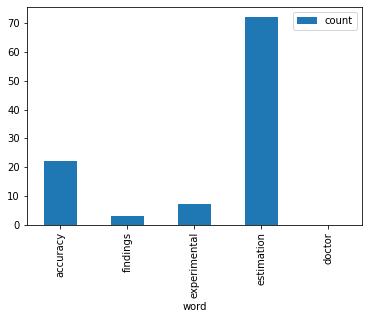

In [108]:
df_multi.plot.bar(x='word', y='count')

## NLTK provides top 5
* This allows the data to drive further work by looking solely at the top N words in the files processed.  By default the tokens are cleaned by removing entries in the NLTK library stopwords list as well as punctuation from the string library.
* Utilizing this rather than user input allows the opportunity for supervised follow-up utilizing some terms from the tokens and additional to narrow in on "hits" in the dataset.
* Since most_common() provides all entries it can be indexed as a traditional list to look anywhere in the list if desired.

In [111]:
# create a frequencity distribution based off of the cleaned tokens
fd = nltk.FreqDist(tokens_removed)

In [117]:
# NLTK most_common(n) provides a list of n length with sublist [word, count]
# create a dataframe utilizing the 5 most common words in the claned token list
data = fd.most_common()
df_fd = pd.DataFrame(data[:5], columns = ["word", "count"])
df_fd

,word,count
0,text,255
1,data,238
2,mining,195
3,information,153
4,cases,150


<AxesSubplot:xlabel='word'>

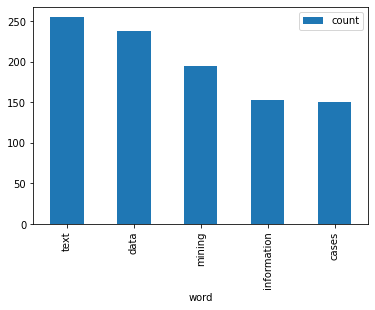

In [110]:
df_fd.plot.bar(x='word', y='count')

---
---
# TO-DO
### immediate

### long-term
* Look into API for digital commons
* Adjust visualizations